In [107]:
import warnings, datetime
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")
df = pd.read_csv('2016.csv', low_memory=False)

In [108]:
coordinate = pd.read_csv("airports.csv")
coordinate

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [109]:
df['DATE']=pd.to_datetime(df['FL_DATE'])

In [110]:
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#__________________________________________________ ___________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
    #_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [111]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,5.617658e+06,5.617658e+06,5.554202e+06,5.554202e+06,5.552240e+06,5.552240e+06,5.549814e+06,5.549814e+06,5.617658e+06,5.549814e+06,5.538145e+06,5.617658e+06,5.617658e+06,5.617652e+06,5.538145e+06,5.538145e+06,5.617658e+06,964239.000000,964239.000000,964239.000000,964239.000000,964239.000000,0.0
mean,2.078520e+03,1.331004e+03,1.333640e+03,8.938011e+00,1.619105e+01,1.355112e+03,1.467264e+03,7.454353e+00,1.490819e+03,1.471570e+03,3.519290e+00,1.172392e-02,2.430194e-03,1.453971e+02,1.401608e+02,1.165268e+02,8.500786e+02,20.257775,2.702736,14.696167,0.084963,24.328406,NaN
std,1.700417e+03,4.895842e+02,5.025129e+02,3.976306e+01,8.827188e+00,5.043022e+02,5.302217e+02,5.700441e+00,5.162847e+02,5.346746e+02,4.187332e+01,1.076405e-01,4.923707e-02,7.642798e+01,7.566283e+01,7.352773e+01,6.195001e+02,57.341275,21.394475,30.584197,2.419614,45.963177,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.040000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.520000e+02,0.000000e+00,0.000000e+00,5.000000e+00,1.400000e+01,4.000000e+00,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,7.110000e+02,9.150000e+02,9.170000e+02,-5.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.105000e+03,1.052000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,8.800000e+01,8.400000e+01,6.200000e+01,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.639000e+03,1.325000e+03,1.328000e+03,-2.000000e+00,1.400000e+01,1.340000e+03,1.507000e+03,6.000000e+00,1.520000e+03,1.511000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02,1.210000e+02,9.700000e+01,6.780000e+02,1.000000,0.000000,2.000000,0.000000,2.000000,NaN
75%,2.855000e+03,1.735000e+03,1.742000e+03,6.000000e+00,1.900000e+01,1.756000e+03,1.914000e+03,9.000000e+00,1.920000e+03,1.918000e+03,6.000000e+00,0.000000e+00,0.000000e+00,1.780000e+02,1.730000e+02,1.480000e+02,1.091000e+03,18.000000,0.000000,19.000000,0.000000,30.000000,NaN
max,8.402000e+03,2.359000e+03,2.400000e+03,2.149000e+03,1.860000e+02,2.400000e+03,2.400000e+03,2.500000e+02,2.400000e+03,2.400000e+03,2.142000e+03,1.000000e+00,1.000000e+00,7.050000e+02,7.780000e+02,7.230000e+02,4.983000e+03,2142.000000,1157.000000,1446.000000,474.000000,1484.000000,NaN


In [112]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DATE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,625.0,949.0,11.0,1005,1000.0,-5.0,0.0,NaN,0.0,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,2238.0,40.0,9.0,2342,49.0,67.0,0.0,NaN,0.0,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN,2016-12-31
5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,715.0,1031.0,4.0,1052,1035.0,-17.0,0.0,NaN,0.0,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,1720.0,1854.0,7.0,1907,1901.0,-6.0,0.0,NaN,0.0,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31


In [113]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#pd.concat([total, percent], axis=1, keys=['Total', 'Percent']


In [114]:
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
Unnamed: 27,5617658,1.000000
CANCELLATION_CODE,5551797,0.988276
LATE_AIRCRAFT_DELAY,4653419,0.828356
SECURITY_DELAY,4653419,0.828356
NAS_DELAY,4653419,0.828356
CARRIER_DELAY,4653419,0.828356
WEATHER_DELAY,4653419,0.828356
ARR_DELAY,79513,0.014154
AIR_TIME,79513,0.014154
ACTUAL_ELAPSED_TIME,79513,0.014154


In [379]:
df = df.loc[df["ORIGIN"].isin(coordinate['IATA_CODE']) | df["DEST"].isin(coordinate['IATA_CODE'])]
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DATE
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617653,2016-12-31,NK,112,IAH,BWI,615,613.0,-2.0,12.0,625.0,949.0,11.0,1005,1000.0,-5.0,0.0,NaN,0.0,170.0,167.0,144.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617654,2016-12-31,NK,113,BWI,IAH,2108,2229.0,81.0,9.0,2238.0,40.0,9.0,2342,49.0,67.0,0.0,NaN,0.0,214.0,200.0,182.0,1235.0,0.0,0.0,0.0,0.0,67.0,NaN,2016-12-31
5617655,2016-12-31,NK,121,ORD,RSW,700,704.0,4.0,11.0,715.0,1031.0,4.0,1052,1035.0,-17.0,0.0,NaN,0.0,172.0,151.0,136.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31
5617656,2016-12-31,NK,124,RSW,ORD,1704,1711.0,7.0,9.0,1720.0,1854.0,7.0,1907,1901.0,-6.0,0.0,NaN,0.0,183.0,170.0,154.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-31


In [384]:
df1=df.loc[df['DATE']>=pd.to_datetime('20160101')]
df1=df1.loc[df1['DATE']<pd.to_datetime('20160102')]
df1['CRS_DEP_TIME'] = create_flight_time(df1,'CRS_DEP_TIME')
df1['WHEELS_OFF'] = create_flight_time(df1,'WHEELS_OFF')
df1['WHEELS_ON'] = create_flight_time(df1,'WHEELS_ON')
df1['CRS_ARR_TIME'] = create_flight_time(df1,'CRS_ARR_TIME')
df1['DEP_TIME'] = create_flight_time(df1,'DEP_TIME')
df1['ARR_TIME'] = create_flight_time(df1,'ARR_TIME')

In [385]:
df1

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DATE
0,2016-01-01,DL,1248,DTW,LAX,2016-01-01 19:35:00,2016-01-01 19:35:00,0.0,23.0,2016-01-01 19:58:00,2016-01-01 21:07:00,13.0,2016-01-01 21:44:00,2016-01-01 21:20:00,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,2016-01-01,DL,1251,ATL,GRR,2016-01-01 21:25:00,2016-01-01 21:30:00,5.0,13.0,2016-01-01 21:43:00,2016-01-01 23:15:00,4.0,2016-01-01 23:21:00,2016-01-01 23:19:00,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
2,2016-01-01,DL,1254,LAX,ATL,2016-01-01 22:55:00,2016-01-01 22:56:00,1.0,19.0,2016-01-01 23:15:00,2016-01-01 05:42:00,5.0,2016-01-01 06:00:00,2016-01-01 05:47:00,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
3,2016-01-01,DL,1255,SLC,ATL,2016-01-01 16:56:00,2016-01-01 17:00:00,4.0,12.0,2016-01-01 17:12:00,2016-01-01 22:05:00,8.0,2016-01-01 22:29:00,2016-01-01 22:13:00,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
4,2016-01-01,DL,1256,BZN,MSP,2016-01-01 09:00:00,2016-01-01 10:12:00,72.0,63.0,2016-01-01 11:15:00,2016-01-01 14:16:00,4.0,2016-01-01 12:16:00,2016-01-01 14:20:00,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13014,2016-01-01,DL,1243,DFW,ATL,2016-01-01 09:45:00,2016-01-01 09:53:00,8.0,11.0,2016-01-01 10:04:00,2016-01-01 12:29:00,5.0,2016-01-01 12:41:00,2016-01-01 12:34:00,-7.0,0.0,NaN,0.0,116.0,101.0,85.0,731.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
13015,2016-01-01,DL,1245,ATL,GSP,2016-01-01 14:10:00,2016-01-01 14:08:00,-2.0,15.0,2016-01-01 14:23:00,2016-01-01 14:51:00,4.0,2016-01-01 15:02:00,2016-01-01 14:55:00,-7.0,0.0,NaN,0.0,52.0,47.0,28.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
13016,2016-01-01,DL,1245,GSP,ATL,2016-01-01 15:45:00,2016-01-01 15:42:00,-3.0,13.0,2016-01-01 15:55:00,2016-01-01 16:28:00,8.0,2016-01-01 16:46:00,2016-01-01 16:36:00,-10.0,0.0,NaN,0.0,61.0,54.0,33.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
13017,2016-01-01,DL,1246,MSP,PIT,2016-01-01 19:48:00,2016-01-01 19:44:00,-4.0,13.0,2016-01-01 19:57:00,2016-01-01 22:28:00,6.0,2016-01-01 22:49:00,2016-01-01 22:34:00,-15.0,0.0,NaN,0.0,121.0,110.0,91.0,726.0,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01


In [386]:
for i in range(13019):
    df1['ORIGIN'][i]=list(coordinate['IATA_CODE']).index(df1['ORIGIN'][i])
    df1['DEST'][i]=list(coordinate['IATA_CODE']).index(df1['DEST'][i])

In [387]:
import dgl
import torch
from dgl.data.utils import save_graphs

In [388]:
def add_edges1(g,root,depth):
    if visit[root] == 1:
        return
    visit[root]=1
    df_temp=df1.loc[(df1['ORIGIN']==df1['DEST'][root])  & (df1['CRS_DEP_TIME']>=df1['CRS_ARR_TIME'][root]) & (df1['CRS_DEP_TIME']<=df1['CRS_ARR_TIME'][root]+datetime.timedelta(minutes=15))]
    #print(df_temp)
    #print('深度：'+str(depth)+',序号： '+str(root)+'孩子数： '+str(df_temp.shape[0])+'到达时间： ')
    #print(df1['CRS_ARR_TIME'][root])
    #print(g1.num_nodes())
    g.ndata['CRS_DEP_TIME'][idx[root]]=(df1['CRS_DEP_TIME'][root]-pd.to_datetime('20160101')).seconds
    g.ndata['DEP_DELAY'][idx[root]]=df1['DEP_DELAY'][root]*60
    g.ndata['CRS_ARR_TIME'][idx[root]]=(df1['CRS_ARR_TIME'][root]-pd.to_datetime('20160101')).seconds
    g.ndata['ARR_DELAY'][idx[root]]=df1['ARR_DELAY'][root]*60
    g.ndata['DEST'][idx[root]]=df1['DEST'][root]
    g.ndata['ORIGIN'][idx[root]]=df1['ORIGIN'][root]
    g.ndata['WHEELS_OFF'][idx[root]]=(df1['WHEELS_OFF'][root]-df1['DEP_TIME'][root]).seconds
    #print(df_temp.shape[0])
    if df_temp.shape[0]==0:
        #print('叶子节点')
        #print()
        return
    else:
        #print('非叶子节点')
        #print()
        for index, row in df_temp.iterrows():
            if idx[index]==0:
                g.add_nodes(1)
                idx[index]=g1.num_nodes()-1

            #print(g1.num_nodes())
            #print(idx[root],idx[index])
            g.add_edge(idx[root],idx[index])
            g.edata['INTERVAL_TIME'][g.num_edges()-1] =(df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds
            #g.edata['AIRPORT'][g.num_edges()-1] = coordinate[ coordinate.IATA_CODE == df1['DEST'][root]].index.tolist()[0]
            #g.edata['AIRCRAFT_NUM']
            #print((df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds)
            
            
            if df1['CRS_DEP_TIME'][index]>=df1['CRS_ARR_TIME'][index]:
                df1['CRS_ARR_TIME'][index]=df1['CRS_ARR_TIME'][index]+datetime.timedelta(days=1)

            #print('conut')
            add_edges1(g,index,depth+1)
        return

In [418]:
import torch as th
idx=th.zeros(100000).type(th.long)
visit=np.zeros(100000)
print(type(idx))
root=124

g1 = dgl.DGLGraph()
g1.add_nodes(1)
idx[root]=g1.num_nodes()-1
g1.ndata['CRS_DEP_TIME']=th.ones(g1.num_nodes(),1)
g1.ndata['DEP_DELAY']=th.ones(g1.num_nodes(),1)
g1.ndata['CRS_ARR_TIME']=th.ones(g1.num_nodes(),1)
g1.ndata['ARR_DELAY']=th.ones(g1.num_nodes(),1)
g1.ndata['WHEELS_OFF']=th.ones(g1.num_nodes(),1)
g1.ndata['DEST']=th.ones(g1.num_nodes(),1)
g1.ndata['ORIGIN']=th.ones(g1.num_nodes(),1)
g1.edata['INTERVAL_TIME']=th.ones(g1.num_edges(),1)
g1.edata['AIRPORT']=th.ones(g1.num_edges(),1)
g1.edata['AIRCRAFT_NUM']=th.ones(g1.num_edges(),1)
add_edges1(g1,root,0)

#
print(g1.num_nodes())

<class 'torch.Tensor'>
109


In [419]:
g1.ndata['feat']=torch.cat((g1.ndata['ORIGIN'],g1.ndata['DEST']),1)
g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['DEP_DELAY']),1)
g1.ndata['feat']=torch.cat((g1.ndata['feat'],g1.ndata['WHEELS_OFF']),1)
temp5=g1.ndata['ARR_DELAY']
print(g1.ndata['ARR_DELAY'])
mask1=temp5>15*60
mask2=temp5<=15*60
print(mask1)
temp5[mask1]=1
temp5[mask2]=0
temp5=temp5.long()
temp5=temp5.squeeze()
g1.ndata['label']=temp5

tensor([[-1020.],
        [  120.],
        [  120.],
        [ -840.],
        [ -300.],
        [ -420.],
        [ 2580.],
        [-1500.],
        [ -480.],
        [ -780.],
        [ 1380.],
        [ 2460.],
        [ 1800.],
        [  240.],
        [ 1260.],
        [   60.],
        [ -780.],
        [ -780.],
        [-1260.],
        [  240.],
        [ 1560.],
        [-1620.],
        [-2040.],
        [10200.],
        [ 5820.],
        [ 6360.],
        [ -120.],
        [  -60.],
        [ 8820.],
        [ -540.],
        [ -900.],
        [ -720.],
        [ 1440.],
        [ -540.],
        [  420.],
        [ -840.],
        [ -660.],
        [-1440.],
        [-2520.],
        [  420.],
        [ 2280.],
        [  780.],
        [ -240.],
        [  180.],
        [ -480.],
        [ 2340.],
        [ 2220.],
        [ 1680.],
        [-1260.],
        [    0.],
        [ 6420.],
        [-1620.],
        [-1860.],
        [ 1320.],
        [-2400.],
        [ 

In [420]:
print(g1.ndata['label'])
print(g1.ndata['feat'])

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
tensor([[   60.,    20.,  -180.,   780.],
        [   20.,   203.,  -120.,  1440.],
        [  203.,    85.,     0.,   840.],
        [   85.,   203.,  -240.,   840.],
        [  203.,   149.,  -180.,  1560.],
        [  203.,   277.,   660.,  1740.],
        [  203.,   193.,  2220.,  1620.],
        [  193.,    51.,  -240.,   660.],
        [  193.,   106.,   540.,   900.],
        [  106.,   285.,   240.,   780.],
        [  193.,   248.,  1980.,   720.],
        [  203.,   106.,  3540.,   720.],
        [  203.,   303.,  2460.,   720.],
        [  303.,   114.,   900.,   540.],
        [  203.,   174.,   600.,  1560.],
  

In [421]:
dgl.save_graphs('graph3.dgl', g1)

In [235]:
(g,), _ = dgl.load_graphs('graph1.dgl')

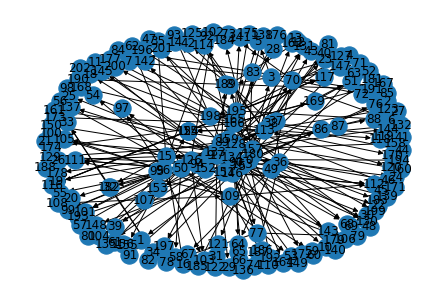

In [236]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g1.to_networkx(), with_labels=True)